In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Winter 23/DH 120 Group Project/Vicky/vader_results.csv")

In [ ]:
#Delete irrelevant columns 
df = df.drop(columns=['word_scores', 'pos', "neg", "neu", "but_count", "Unnamed: 0"])
# df = df.drop(columns=['text'])

In [ ]:
# Sort based on compund score
sorted_df = df.sort_values(by = 'compound')
sorted_df = sorted_df.drop(columns=["text"])
sorted_df

,Unnamed: 0,word_scores,compound,pos,neu,neg,but_count,user_location2
9460,9461,"{0, 0, -0.8, -1.2, 0, 0, 0, 0, 0.999, 0, -1.55...",-0.990,0.073,0.329,0.598,1.0,Berlin
13073,13074,"{0, 0, 0, -1.7, 0, 0, 0, -2.6, -1.2, 0, 0, 0, ...",-0.981,0.000,0.435,0.565,0.0,United States
419,420,"{0, 0, 0, 0, 0, 0, 0, 0, -2.493, 0, 0, 0, 0, 0...",-0.979,0.000,0.570,0.430,0.0,"Amherst, MA - Greenfield , MA"
14066,14067,"{0, 0, 0, 0, 0, 0, -1.2, 0, 0, -2.6, 0, 0, 0, ...",-0.972,0.000,0.597,0.403,0.0,"Chicago, IL"
4699,4700,"{-1.1, 0, 0, -3.9, 0, 0, 0, 0, 0, 0, 0, 0, -3....",-0.968,0.000,0.488,0.512,0.0,NaN
...,...,...,...,...,...,...,...,...
13642,13643,"{0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.973,0.300,0.700,0.000,1.0,"Cleveland, OH"
8113,8114,"{0, 0, 1.7, 0, 1.7, 0, 1.7, 0, 1.7, 0, 1.7, 0,...",0.977,0.490,0.510,0.000,0.0,"Michigan, USA"
457,458,"{0, 0, 0, 0, 0, 0, 0, 0, 0, 3.4637, 0, -0.5, 0...",0.983,0.410,0.554,0.036,0.0,Any pronoun; appreciate he/him
10757,10758,"{0, 0, 0, 0, 0, 2.433, 0, 0, 0, 2.433, 0, 1.1,...",0.992,0.612,0.388,0.000,0.0,NaN


In [ ]:
grouped_df = df.groupby('user_location2').describe()

AttributeError: ignored

In [ ]:
grouped_df_sorted = grouped_df.sort_values([('compound', 'count')], ascending=False)

In [ ]:
df_final = grouped_df_sorted[grouped_df_sorted['compound']["count"] > 20]  


In [ ]:
df_final = df_final.sort_values([('compound', 'mean')], ascending=False)

In [ ]:
# We want to take the top 3 and bottom 3 countries that have more than 20 tweets that originated from the country
df_top_3 = df_final[0:5]
df_bottom_3 = df_final.tail(5)

In [ ]:
df_concat = pd.concat([df_top_3, df_bottom_3])

In [ ]:
df_concat

Unnamed: 0                                             \
                             count         mean          std     min      25%   
user_location2                                                                  
India                         22.0  4484.954545  4621.223714    22.0  1665.25   
Canada                        64.0  6769.890625  4765.237888   869.0   885.75   
New York                      24.0  9830.708333  3929.554455  2683.0  7460.00   
United Kingdom                43.0  8073.930233  3689.415739  4014.0  4024.50   
England, United Kingdom       41.0  7336.902439  4756.994402  1224.0  1234.00   
Florida, USA                  33.0  8348.242424  4114.825733  1320.0  7949.00   
Rio de Janeiro, Brasil        35.0  5213.171429  3086.535937  3234.0  3242.50   
São Paulo, Brasil             39.0  4710.205128  2718.532578  3400.0  3409.50   
Arkansas, USA                 25.0  8084.240000  5009.108606   483.0  7146.00   
Minnesota City, MN            28.0  2491.500000     8.225975  2478.0  2484.75   

                                                    compound            ...  \
                             50%       75%      max    count      mean  ...   
user_location2                                                          ...   
India                     1670.5   7940.75  13451.0     22.0  0.464000  ...   
Canada                    7895.0  10574.50  14335.0     64.0  0.274141  ...   
New York                 10747.0  12991.25  14218.0     24.0  0.226667  ...   
United Kingdom            8614.0  10431.50  14339.0     43.0  0.214698  ...   
England, United Kingdom   9150.0  10524.00  13745.0     41.0  0.204341  ...   
Florida, USA              8661.0  11480.00  14177.0     33.0 -0.164545  ...   
Rio de Janeiro, Brasil    3251.0   8208.50  12190.0     35.0 -0.166829  ...   
São Paulo, Brasil         3419.0   3428.50  11712.0     39.0 -0.179641  ...   
Arkansas, USA             7818.0  12470.00  13975.0     25.0 -0.212960  ...   
Minnesota City, MN        2491.5   2498.25   2505.0     28.0 -0.453250  ...   

                             neg        but_count                           \
                             75%    max     count      mean       std  min   
user_location2                                                               
India                    0.00000  0.100      22.0  0.045455  0.213201  0.0   
Canada                   0.07925  0.302      64.0  0.078125  0.270490  0.0   
New York                 0.09475  0.215      24.0  0.166667  0.380693  0.0   
United Kingdom           0.10300  0.208      43.0  0.186047  0.393750  0.0   
England, United Kingdom  0.10100  0.231      41.0  0.073171  0.263652  0.0   
Florida, USA             0.16500  0.256      33.0  0.000000  0.000000  0.0   
Rio de Janeiro, Brasil   0.13600  0.268      35.0  0.000000  0.000000  0.0   
São Paulo, Brasil        0.13600  0.204      39.0  0.000000  0.000000  0.0   
Arkansas, USA            0.18400  0.208      25.0  0.000000  0.000000  0.0   
Minnesota City, MN       0.18575  0.241      28.0  0.000000  0.000000  0.0   

                                             
                         25%  50%  75%  max  
user_location2                               
India                    0.0  0.0  0.0  1.0  
Canada                   0.0  0.0  0.0  1.0  
New York                 0.0  0.0  0.0  1.0  
United Kingdom           0.0  0.0  0.0  1.0  
England, United Kingdom  0.0  0.0  0.0  1.0  
Florida, USA             0.0  0.0  0.0  0.0  
Rio de Janeiro, Brasil   0.0  0.0  0.0  0.0  
São Paulo, Brasil        0.0  0.0  0.0  0.0  
Arkansas, USA            0.0  0.0  0.0  0.0  
Minnesota City, MN       0.0  0.0  0.0  0.0  

[10 rows x 48 columns]

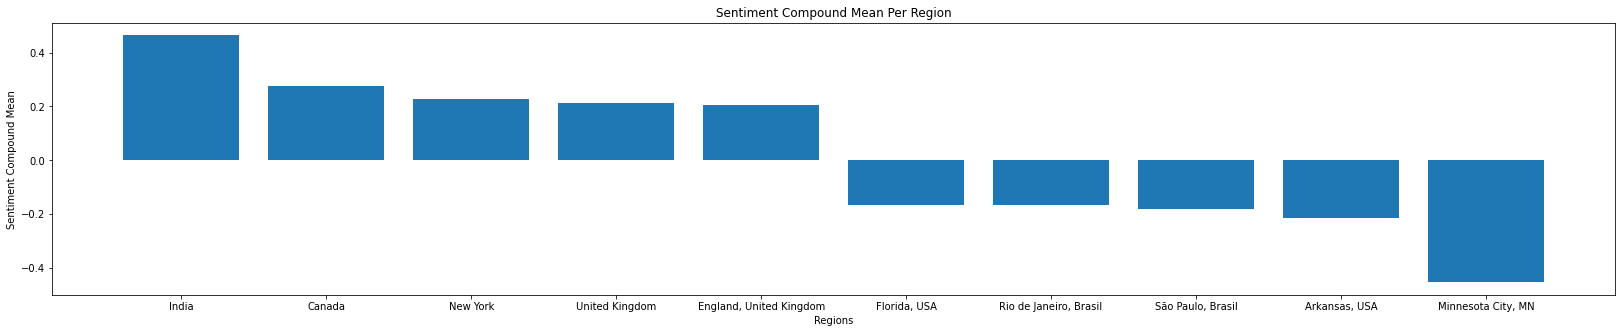

In [ ]:
regions = list(df_concat.index.values)
means = list(df_concat["compound"]["mean"])
plt.subplots(figsize=(28,5))
plt.bar(regions, means)
plt.title("Sentiment Compound Mean Per Region")
plt.xlabel("Regions")
plt.ylabel("Sentiment Compound Mean")

plt.show()